Lets see which one is the most crowed station. 

In [18]:
import numpy as np 
import pandas as pd
import datetime
import gmplot 

from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("Data/trip.csv")
df.start_date = pd.to_datetime(df.start_date, format='%m/%d/%Y %H:%M') 
df.end_date = pd.to_datetime(df.end_date, format='%m/%d/%Y %H:%M')
df.head(3)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214


Por resultados anteriores, limpamos el set de datos con viajes mayores a 3 min y menores a 370

In [19]:
df.duration /= 60
df = df[df.duration <= 370]
df = df[df.duration >3]
#Ver el analisis de flor sobre los nombres mal escritos de las estaciones " post at kearny"

In [128]:
# print (len(bicimasusada))
# df.groupby('bike_id').sum()
# stationIdBicis = df.loc[:,['start_station_id','bike_id']]
# stationIdBicis.head(5)
# for index, row in bicimasusada.iterrows():
#     print (row['start_station_name']) 

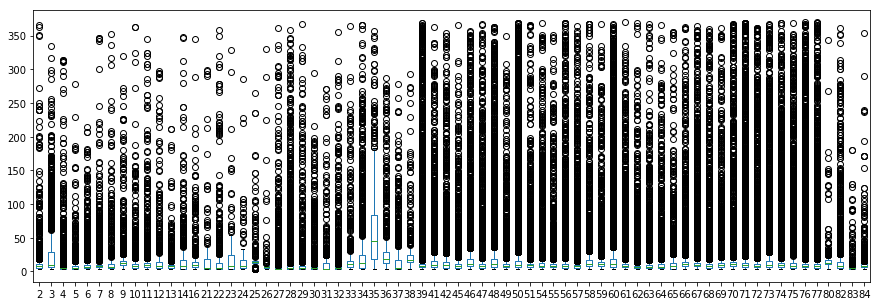

In [21]:


grupo = df.loc[:,['start_station_id','duration']]

grupo['subindex'] = grupo.groupby('start_station_id').cumcount() + 1
grupo = pd.pivot_table(grupo,index='subindex',columns='start_station_id',values='duration')
grupo.plot.box(figsize=(15,5));
#grupo.describe()

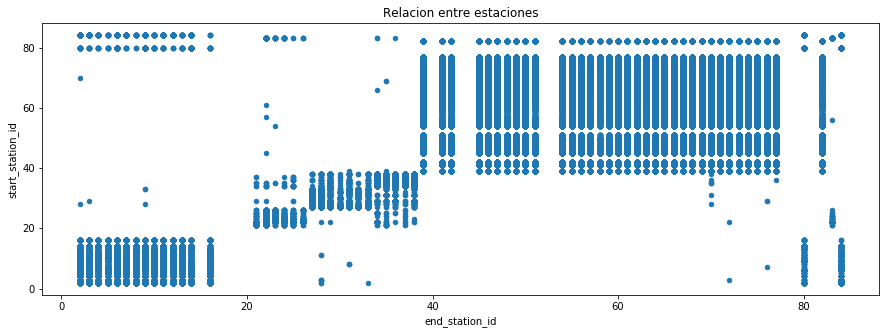

In [43]:

df.plot.scatter('end_station_id','start_station_id',alpha=1,title = "Relacion entre estaciones",figsize=(15,5));


In [35]:
viajesInterCiudad = df[df.end_station_id == 2]
viajesInterCiudad = viajesInterCiudad[viajesInterCiudad.start_station_id > 60]
viajesInterCiudad.head(3)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
5537,12278,294.366667,2013-09-06 11:35:00,San Francisco Caltrain (Townsend at 4th),70,2013-09-06 16:29:00,San Jose Diridon Caltrain Station,2,502,Customer,NaN
145922,430365,8.783333,2014-08-29 08:59:00,Ryland Park,84,2014-08-29 09:08:00,San Jose Diridon Caltrain Station,2,696,Subscriber,95112
146148,430094,10.166667,2014-08-29 07:36:00,Ryland Park,84,2014-08-29 07:47:00,San Jose Diridon Caltrain Station,2,120,Subscriber,95110


# Cuál es la estación de donde salieron más viajes ? Rta. ID: 70 - buscar nombre

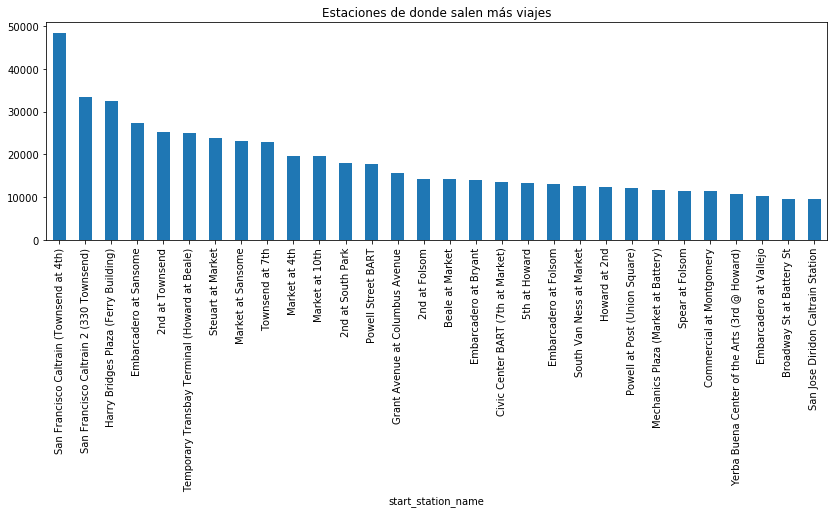

In [56]:
plt.figure()
plt.ylabel = "1"
df.groupby('start_station_name').count()['id'].sort_values(ascending=False)[0:30].plot(title = "Estaciones de donde salen más viajes",kind='bar',figsize=(14,4))


# Cuál es la estación a la que llegaron más viajes? Rta. ID: 70 - buscar nombre

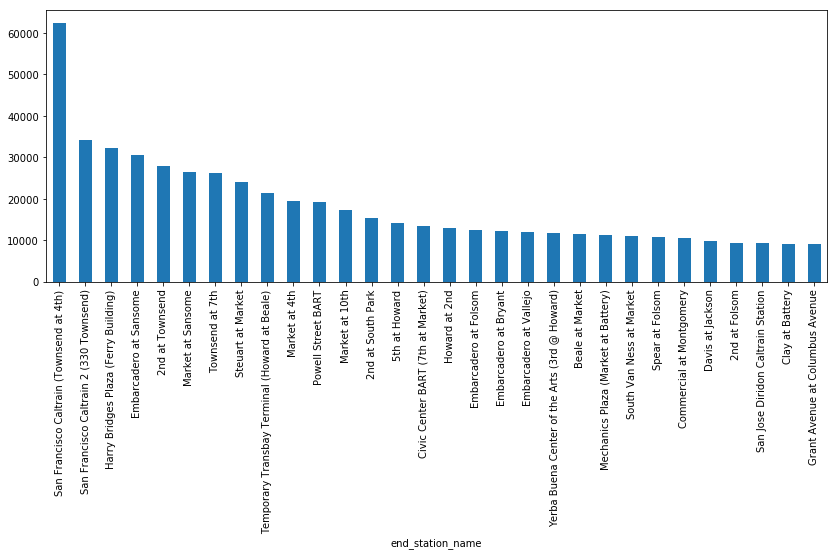

In [131]:
df.groupby('end_station_name').count()['id'].sort_values(ascending=False)[0:30].plot(kind='bar',figsize=(14,5))

# Concetración de estaciones con heatmap

In [41]:
stations = pd.read_csv("Data/station.csv")
gmap = gmplot.GoogleMapPlotter(37.336, -121.894074, 16)
gmap.heatmap(stations.lat, stations.long)  
gmap.draw("concetraciónDeEstaciones.html")


En el mapa se puede ver dos puntos de mayor concentracion de estaciones, En san josé y en San francisco. 
Siendo ésta última la que mayor concentración de estaciones de bicicletas posee.

# Heatmap de donde salen más cantidad de viajes. 


In [42]:
googlePlotMap= df.loc[:,['start_station_id','end_station_id']]
googlePlotMap.columns = ['id' , 'end_station_id']
stationPlot = stations.loc[:,['id','lat','long']]
innerJoin = pd.merge(googlePlotMap,stationPlot, on='id', how='inner')


gmap = gmplot.GoogleMapPlotter(37.336, -121.894074, 16)
gmap.heatmap(innerJoin.lat, innerJoin.long)  
gmap.draw("startStationIdHeatMap.html")


Se puede ver que en la ciudad de San francisco se ve una mayor concentración de donde salen los viajes. A diferencia de san josé,o mountain view
. Esto se debe a que en san francisco se realizan mayor cantidad de viajes. 

# Analizar sólo en san francisco caapitall 

# Análogo al plot anterior, pero a donde se dirigen los viajes. 

In [43]:
#Heatmap a donde llegan la mayor cantidad de viajes. 
googlePlotMap= df.loc[:,['start_station_id','end_station_id']]
googlePlotMap.columns = ['start_station_id' , 'id']
stationPlot = stations.loc[:,['id','lat','long']]
innerJoin = pd.merge(googlePlotMap,stationPlot, on='id', how='inner')

gmap = gmplot.GoogleMapPlotter(37.336, -121.894074, 16)
gmap.heatmap(innerJoin.lat, innerJoin.long)  
gmap.draw("endStationIdHeatMap.html")


Se puede ver en "endStationIdHeatMap" que en san francisco hay 2 puntos donde más llegan los viajes. En la estaciónd de trenes calltrain (y sus estaciones más cercanas) y en el puerto del ferry.

# Posiciones de las estaciones en google maps

In [44]:


googlePlotMap= df.loc[:,['start_station_id','end_station_id']]
googlePlotMap.columns = ['id' , 'end_station_id']


groupedby = googlePlotMap.groupby('id',as_index=False).count()
stationPlot = stations.loc[:,['id','lat','long']]
innerJoin = pd.merge(groupedby,stationPlot, on='id', how='inner')

import gmplot

gmap = gmplot.GoogleMapPlotter(37.336, -121.894074, 16)
#gmap.plot(innerJoin.lat, innerJoin.long, 'cornflowerblue', edge_width=4)
for index, row in innerJoin.iterrows():
    gmap.scatter([row['lat']], [row['long']], '#FFFFFF', row['end_station_id']*0.005, marker=False)
    gmap.marker(row['lat'],row['long'],color='#FF0000',title=str(row['id']))
    
gmap.draw("mymap.html")




In [45]:

stations = pd.read_csv("Data/station.csv")

googlePlotMap= df.loc[:,['start_station_id','end_station_id']]
googlePlotMap.columns = ['id' , 'end_station_id']


groupedby = googlePlotMap.groupby('id',as_index=False).count()
stationPlot = stations.loc[:,['id','lat','long']]
#stationPlot = stationPlot[stationPlot.lat > 38]
#stationPlot = stationPlot[stationPlot.long < -121]

innerJoin = pd.merge(groupedby,stationPlot, on='id', how='inner')
innerJoin =  innerJoin[innerJoin.id > 38] 
innerJoin =  innerJoin[innerJoin.id < 80] 

import gmplot
gmap.from_geocode("San Francisco")
# gmap = gmplot.GoogleMapPlotter(3.336, -121.894074, 16)
gmap.heatmap(innerJoin.lat, innerJoin.long)  

# #gmap.plot(innerJoin.lat, innerJoin.long, 'cornflowerblue', edge_width=4)
# for index, row in innerJoin.iterrows():
#     gmap.scatter([row['lat']], [row['long']], '#FFFFFF', row['end_station_id']*0.005, marker=False)
#     gmap.marker(row['lat'],row['long'],color='#FF0000',title=str(row['id']))
    
gmap.draw("mymap.html")




In [46]:
from_to = df[df['end_station_id'] == 2].groupby('start_station_id').size()
#from_to.sort_values(ascending=False)[0:72].plot(kind='bar',figsize=(14,5))
#from_to.sort_values(ascending=False)

# Veamos las realaciones que hay entre las estaciones ( cantidad de viajes entre ellas)

KeyError: 'start_station_id'

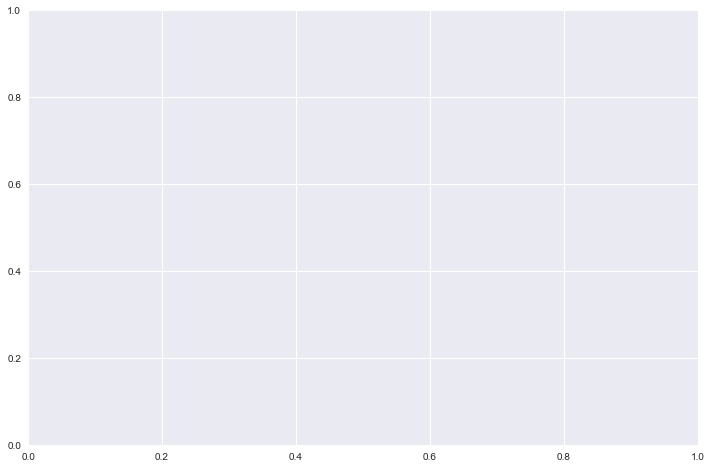

In [57]:
import seaborn as sns
from pandas.tools.plotting import scatter_matrix


#fig, ax = plt.subplots(figsize=(18,12))     
#prueba = df[df.end_station_id < 7]
#prueba = prueba[prueba.start_station_id < 7]
#prueba.groupby('start_station_id').count()
plotArea = pd.crosstab(df['end_station_id'],df['start_station_id'])
#sns.heatmap(pd.crosstab(df['end_station_id'],df['start_station_id']));
#scatter_matrix(plotArea, alpha=0.2, figsize=(10, 10), diagonal='kde')
plotArea.plot.scatter('start_station_id','end_station_id',alpha=0.25,figsize=(12,8));
#plotArea.plot.area()

# Relaciones entre estaciones (cant viajes) en una franja horaria determinada


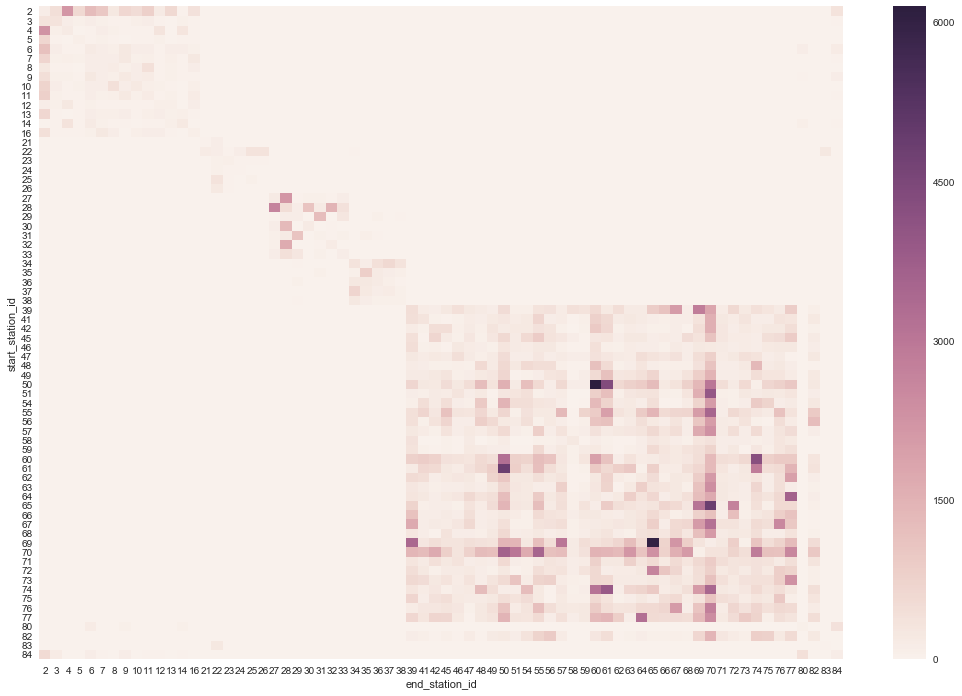

In [59]:
#ahora veo la relacion entre estaciones pero por una franja horaria.
#prueba = df[(df.start_station_id < 20 )]
#prueba = prueba[(prueba.end_station_id <20 )]
prueba = df
# prueba['hour'] =  pd.to_datetime(df['start_date']).dt.hour
# prueba = prueba[prueba.hour > 7]
# prueba = prueba[prueba.hour < 10]

fig, ax = plt.subplots(figsize=(18,12))         # Sample figsize in inches
#prueba = df

sns.heatmap(pd.crosstab(prueba['start_station_id'],prueba['end_station_id']));


